# STAT 306 Group Project

### Correlation between Echocardiography Results & Cardiovascular Patients’ Survival Months

## 1. Abstract

Cardiovascular diseases (CVDs) are the number 1 cause of death globally.  In the United Statesalone, approximately 1.5 million heart attacks and strokes occur every year in the United States.More than 800,000 people in the United States die from cardiovascular disease each year—that’s 1in every 3 deaths, and about 160,000 of them occur in people under age 65. Echocardiographyis one of the most prominent methods used for CVD diagnosis.  In this study, we aim to examinewhether echocardiography results are good predictors for patients’ total survival months, andpotentially identify the key echocardio factors that are indicative of the patients’ survivals.

The data are obtained from a U.S. clinical trial studied by Steven Salzberg at Harvard Universityin 1989.  All 132 patients suffered from heart attacks at some point before the study was conducted.Echocardiography examinations were performed on all patients.  Multivariate regression analysisand exhaustive, forward and backward cross validation were performed to study the potentialcorrelations between survival months and echocardiography results.  However, we found that thevariables were unable to generate a good predictive linear regression model, with the highestr-squared model being approximately 45 percent.  By defining the existing limitations of theanalysis, the study confirms our future research objective of using cox regression and decisiontrees to further study the correlation between echocardiography results and patients’ survival

## 2. Introduction
### 2.1. Project Goal

Heart attack, or myocardial infarction (MI), occurs when the flow of blood to the heart is blocked.WHO reported that cardiovascular diseases (CVDs) are the number 1 cause of death globally,taking an estimated 17.9 million lives each year.  CVDs create a significant impact both sociallyand economically.  According to the American Heart Association, the direct and indirect costsof  cardiovascular  diseases  and  stroke  totaled  more  than  316.6  billion,  which  includes  healthexpenditures and lost productivity.Echocardiography is one of the most prominent methods used for CVD diagnosis as it providescrucial information including the variables listed in the part 2.  In this research, we aim to use theechocardiography explanatory variables listed above to predict the patients’ total survival months.This analysis will help identify the key echocardio factors that affect the patients’ survivals, andexamine whether echocardiography results are good predictors for patients’ total survival months.

## 3. Methodology
### 3.1. Data Summaries

The data set was collected in 1989, it contains information of 132 patients in a U.S. clinical trialstudied by Steven Salzberg at Harvard University.  All 132 patients suffered from heart attacks atsome point before the study was conducted.  Echocardiography examinations were performed onall patients.  The variables studied include:

1.  **Survival Month**:  The number of months a patient survived (has survived, if patient is stillalive).  Because all the patients had their heart attacks at different times, it is possible that somepatients have survived less than one year but they are still alive.  Check the second variable toconfirm this.  Such patients cannot be used for the prediction task mentioned above. The unit ofthis variable is months.

2.  **Still-alive** :  Dummy variable.  0 = dead at end of survival period, 1 = still alive.

3.  **Age at Heart Attack** :  Age in years when the patient’s first heart attack occurred.  The unit ofthis variable is years.

4.  **Pericardial-Effusion (PE)** : Dummy Variable.  Pericardial effusion is fluid around the heart.0=no fluid, 1=fluid.  Pericardial effusion is the buildup of extra fluid in the space around theheart.  If too much fluid builds up, it can put pressure on the heart.  This can prevent it frompumping normally.  PE is examined using echocardiography.

5.  **Fractional-Shortening (FS)** : A measure of contractility around the heart.  Fractional shortening(FS) is calculated by measuring the percentage change in left ventricular diameter during systole,examined using echocardiography.  The unit of FS variable is observed as percentage values

6.  **EPSS** : E-point septal separation,  another measure of contractility.  Larger Numbers areincreasingly abnormal.  EPSS can be examined using echocardiography by measuring distance inspace separating the anterior MV leaflet from the septal wall.  The unit of EPSS is millimeter(mm).

7.  **LVDD** : left ventricular end-diastolic dimension, examined using echocardiography.  This isa measure of the size of the heart at the end-diastole.  Large hearts tend to be sick hearts.The LVDD variable is observed as percentage values 

8.  **Wall-Motion-Index** :  equals wall-motion-score divided by number of segments seen.  Using astandard transthoracic echocardiography sequence, each myocardial segment is assigned a scorefrom 1 to 4.  Usually 12-13 segments are seen in an echocardiogram

## 4. Data Analysis

### 4.1. Loading the data

In [1]:
install.packages("car")
install.packages("leaps")
install.packages("boot")
install.packages("corrplot")
install.packages("RColorBrewer")
install.packages("PerformanceAnalytics")
install.packages("ggplot2")
install.packages("caret")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("tidyr")
install.packages("DataExplorer")

library(ggplot2)
library(caret)
library(rpart)
library(rpart.plot)
library(tidyr)
library(DataExplorer)
library(dplyr)
library(tidyverse)
library(car)
library(leaps)
library(boot)
library(corrplot)
library(RColorBrewer)
library(PerformanceAnalytics)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unsp

In [2]:
data = read.csv("echocardiogram.data",na.strings=c("NA","?"))
colnames(data) <- c("survivalM", "alive", "age", "pe", "fs","epss", 
                    "lvdd", "wmScore", "wmIndex", "mult", "name", "group", "alive1")
data = data %>% select(-c("name", "group")) 
head(data)
str(data)

,survivalM,alive,age,pe,fs,epss,lvdd,wmScore,wmIndex,mult,alive1
,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,19,0,72,0,0.380,6.000,4.100,14.0,1.700,0.588,0
2,16,0,55,0,0.260,4.000,3.420,14.0,1.000,1.000,0
3,57,0,60,0,0.253,12.062,4.603,16.0,1.450,0.788,0
4,19,1,57,0,0.160,22.000,5.750,18.0,2.250,0.571,0
5,26,0,68,0,0.260,5.000,4.310,12.0,1.000,0.857,0
6,13,0,62,0,0.230,31.000,5.430,22.5,1.875,0.857,0


'data.frame':	131 obs. of  11 variables:
 $ survivalM: num  19 16 57 19 26 13 50 19 25 10 ...
 $ alive    : int  0 0 0 1 0 0 0 0 0 1 ...
 $ age      : num  72 55 60 57 68 62 60 46 54 77 ...
 $ pe       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ fs       : num  0.38 0.26 0.253 0.16 0.26 0.23 0.33 0.34 0.14 0.13 ...
 $ epss     : num  6 4 12.1 22 5 ...
 $ lvdd     : num  4.1 3.42 4.6 5.75 4.31 ...
 $ wmScore  : num  14 14 16 18 12 22.5 14 16 15.5 18 ...
 $ wmIndex  : num  1.7 1 1.45 2.25 1 ...
 $ mult     : num  0.588 1 0.788 0.571 0.857 ...
 $ alive1   : int  0 0 0 0 0 0 0 0 0 1 ...


### 4.2. Data Preprocessing

#### 4.2.1 Converting binary varaibles to factors

In [3]:
data$pe = factor(data$pe, labels=c("No-Fluid", "Fluid"))
data$alive = factor(data$alive, labels=c("Dead", "Alive"))
data$alive1 = factor(data$alive1, labels=c("Dead", "Alive"))
head(data)
levels(data$pe)
is.factor(data$pe)

,survivalM,alive,age,pe,fs,epss,lvdd,wmScore,wmIndex,mult,alive1
,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,19,Dead,72,No-Fluid,0.380,6.000,4.100,14.0,1.700,0.588,Dead
2,16,Dead,55,No-Fluid,0.260,4.000,3.420,14.0,1.000,1.000,Dead
3,57,Dead,60,No-Fluid,0.253,12.062,4.603,16.0,1.450,0.788,Dead
4,19,Alive,57,No-Fluid,0.160,22.000,5.750,18.0,2.250,0.571,Dead
5,26,Dead,68,No-Fluid,0.260,5.000,4.310,12.0,1.000,0.857,Dead
6,13,Dead,62,No-Fluid,0.230,31.000,5.430,22.5,1.875,0.857,Dead


[1] "No-Fluid" "Fluid"

[1] TRUE

#### 4.2.2. Removing NA and missing values

In [4]:
#summary(data)
na_count <-sapply(data, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
na_count

,na_count
,<int>
survivalM,2
alive,1
age,5
pe,1
fs,8
epss,15
lvdd,11
wmScore,4
wmIndex,1


In [5]:
data1 = na.omit(data)
nrow(data1)

[1] 60

### 4.3. Basic EDA and Visualization

#### 4.3.1. Number of months a patient survived vs Pericardial Effusion

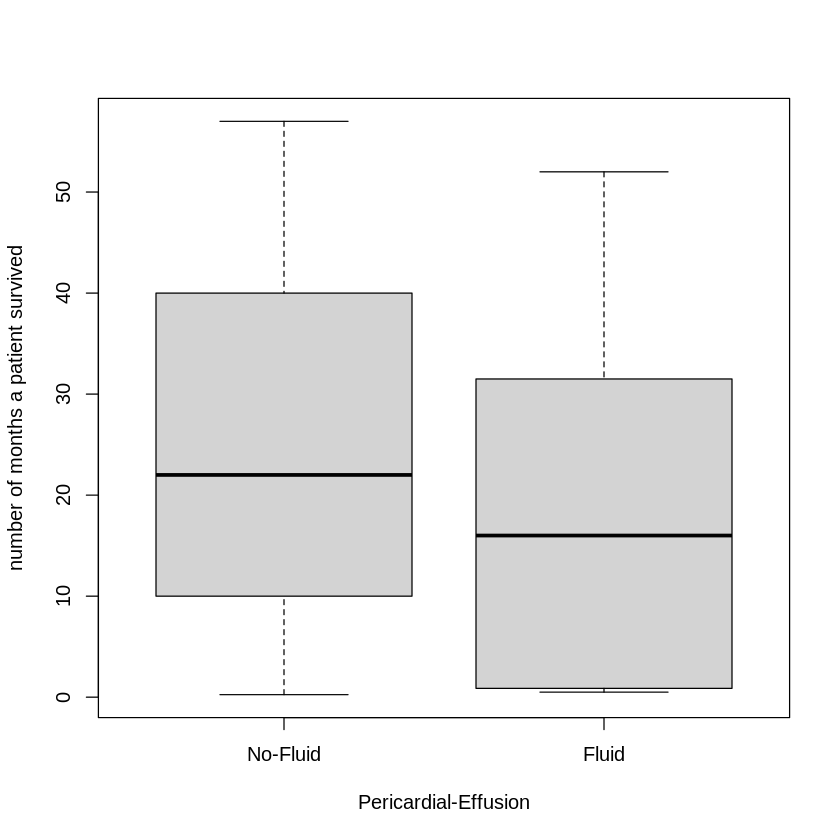

In [6]:
boxplot(survivalM ~ pe, data = data1, xlab = "Pericardial-Effusion",
        ylab = "number of months a patient survived")

#### 4.3.2. Number of months a patient survived vs Fractional-Shortening

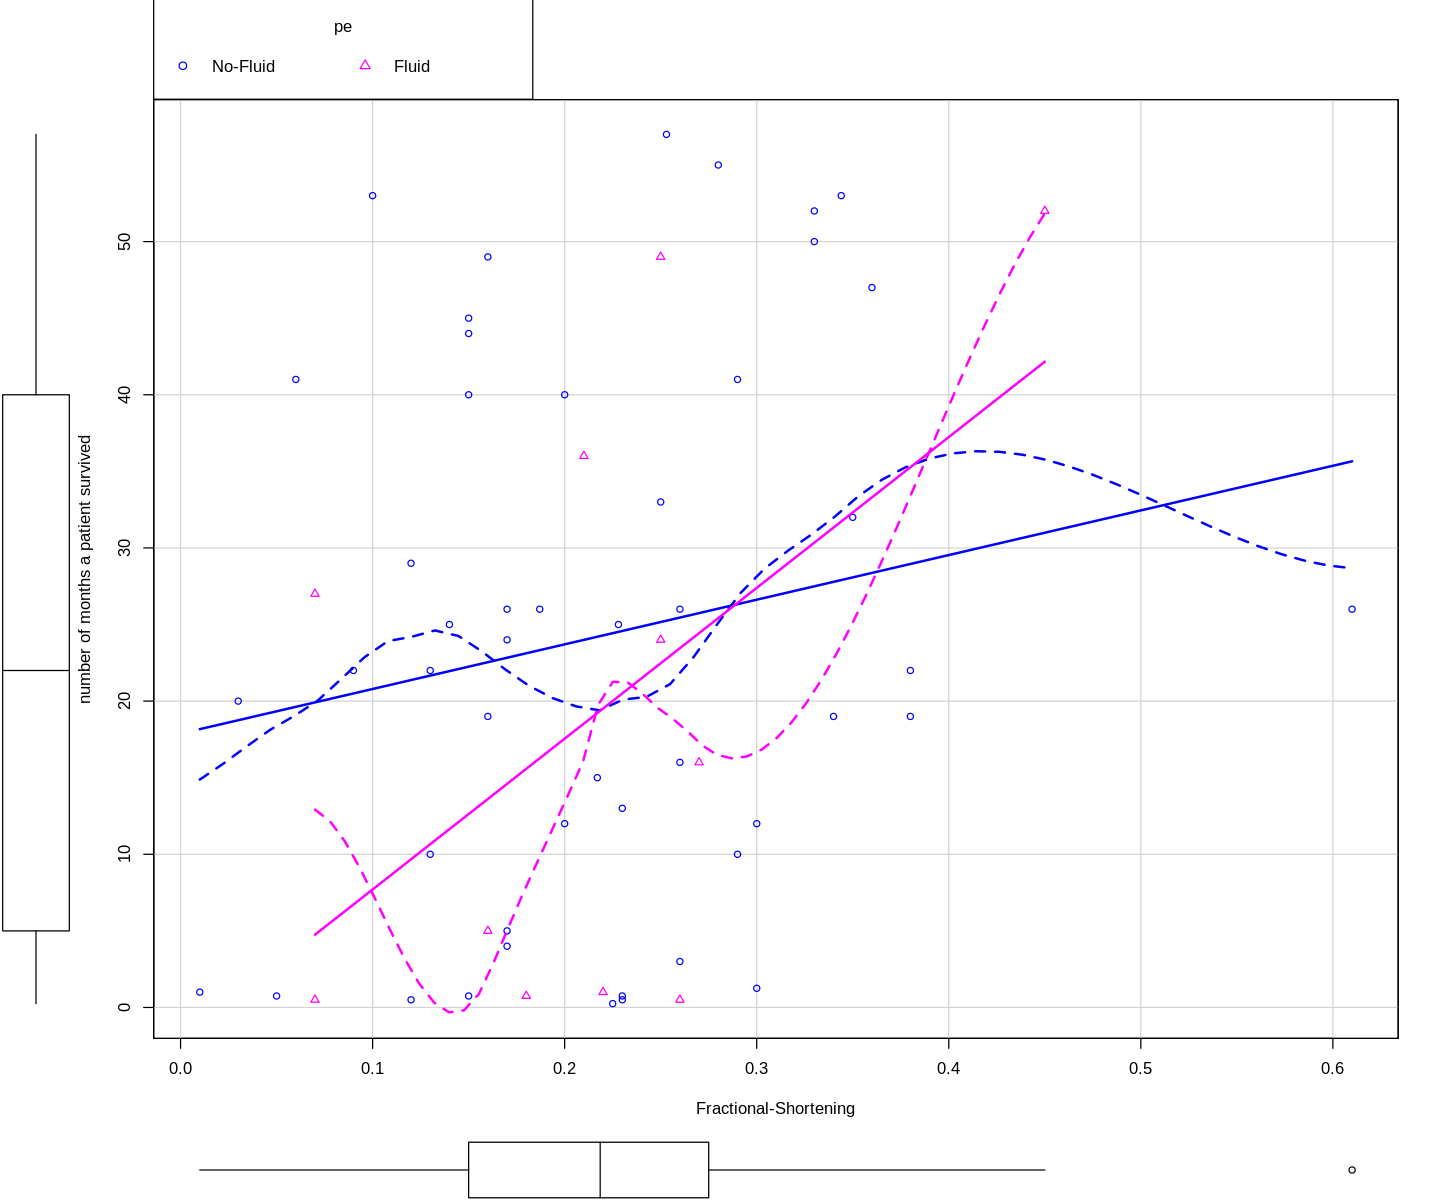

In [7]:
options(repr.plot.width=12, repr.plot.height=10)
suppressWarnings(
scatterplot(survivalM ~ fs | pe, data=data1, lwd=2,
            xlab="Fractional-Shortening",
            ylab="number of months a patient survived",
            legend.plot=TRUE,
            boxplots="xy"
)
)

#### 4.3.3. Number of months a patient survived vs Age factored by alive1

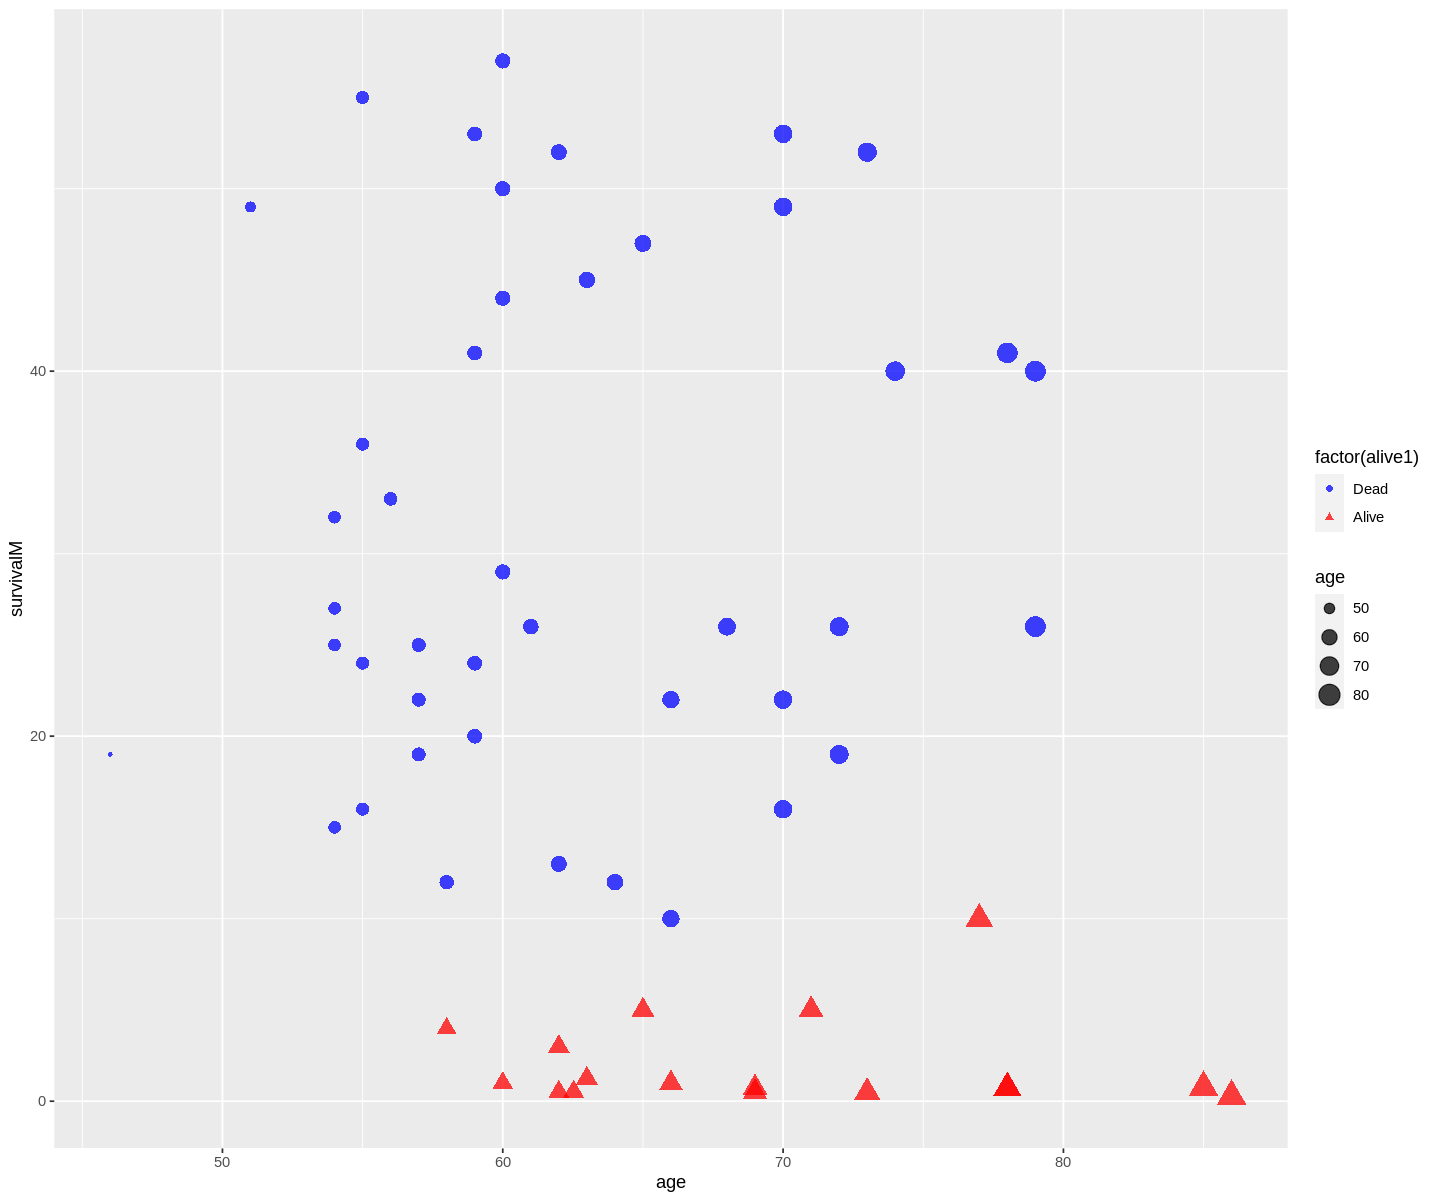

In [8]:
ggplot(data1, aes(age, survivalM, color = factor(alive1), size=age, 
                  shape = factor(alive1))) + geom_point(alpha = 0.75) + scale_color_manual(values=c('blue','red'))

#### 4.3.4. Number of months a patient survived vs Age factored by alive

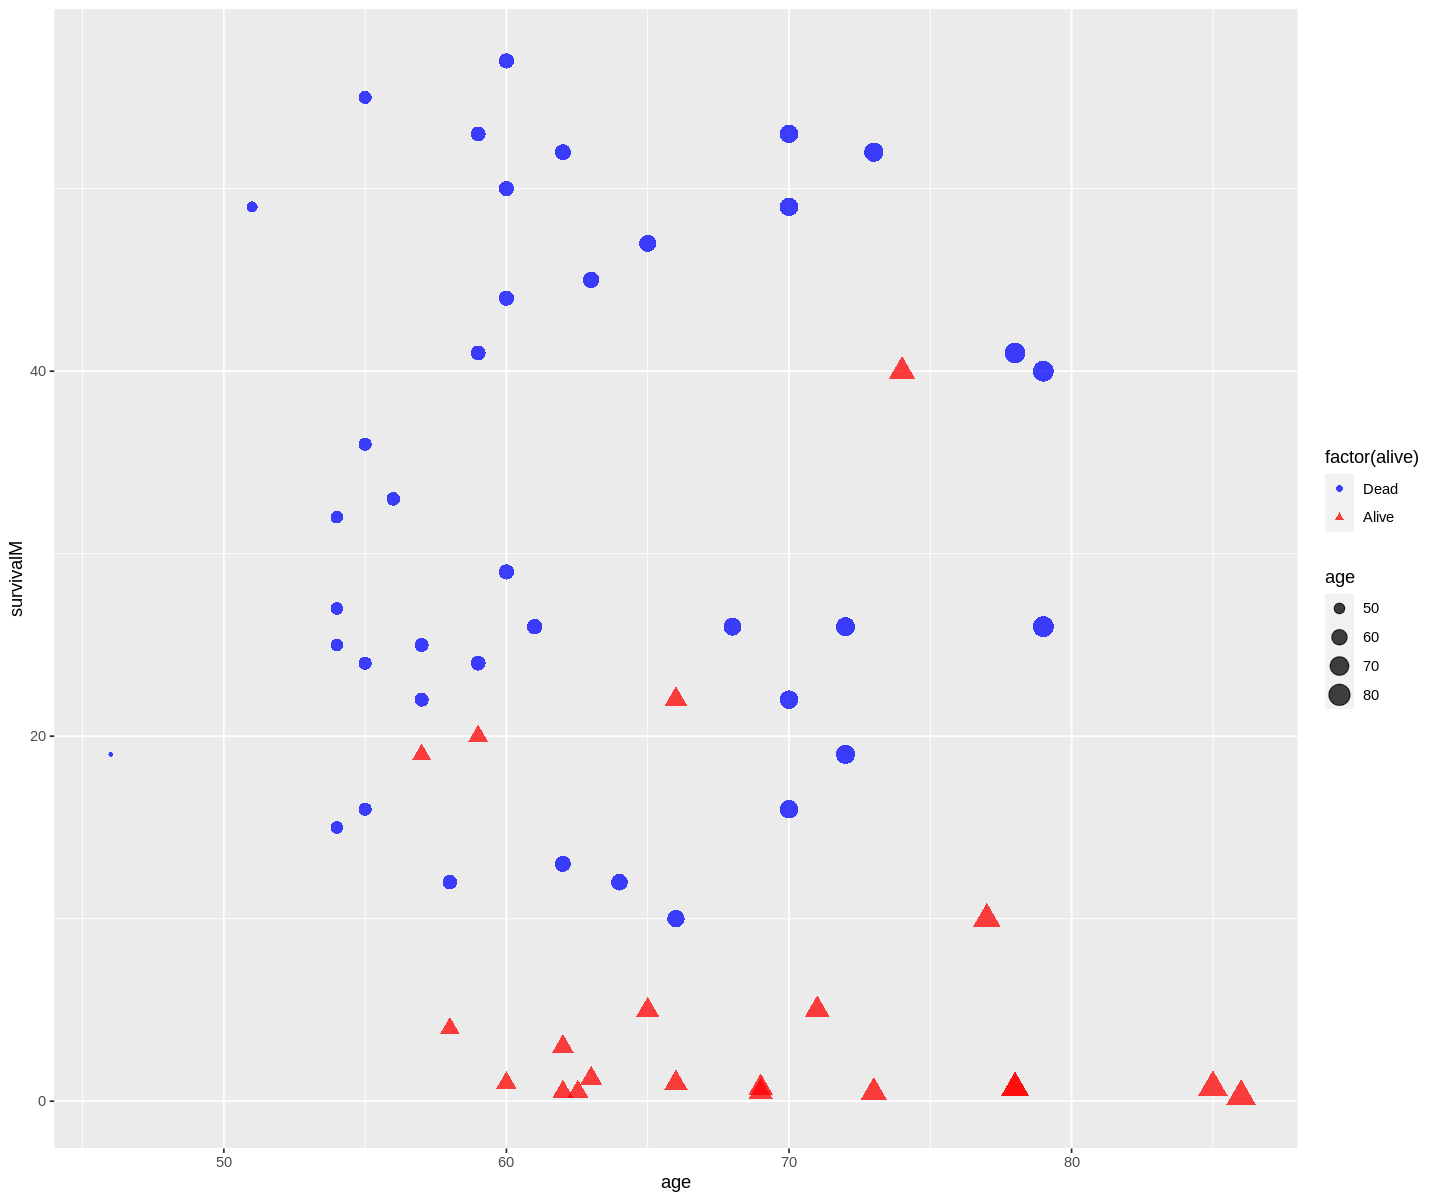

In [9]:
ggplot(data1, aes(age, survivalM, 
                  color = factor(alive), 
                  size = age, 
                  shape = factor(alive))) + geom_point(alpha = 0.75) + scale_color_manual(values=c('blue','red'))

#### 4.3.5. Filtering data

In [10]:
data1 = data1 %>% filter(survivalM >=12)
head(data1)
nrow(data1)

,survivalM,alive,age,pe,fs,epss,lvdd,wmScore,wmIndex,mult,alive1
,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,19,Dead,72,No-Fluid,0.380,6.000,4.100,14.0,1.700,0.588,Dead
2,16,Dead,55,No-Fluid,0.260,4.000,3.420,14.0,1.000,1.000,Dead
3,57,Dead,60,No-Fluid,0.253,12.062,4.603,16.0,1.450,0.788,Dead
4,19,Alive,57,No-Fluid,0.160,22.000,5.750,18.0,2.250,0.571,Dead
5,26,Dead,68,No-Fluid,0.260,5.000,4.310,12.0,1.000,0.857,Dead
6,13,Dead,62,No-Fluid,0.230,31.000,5.430,22.5,1.875,0.857,Dead


[1] 42

#### 4.5.6. Correlation Plot

In [11]:
corr = cor(data1 %>% select(-c("pe","alive","alive1")))

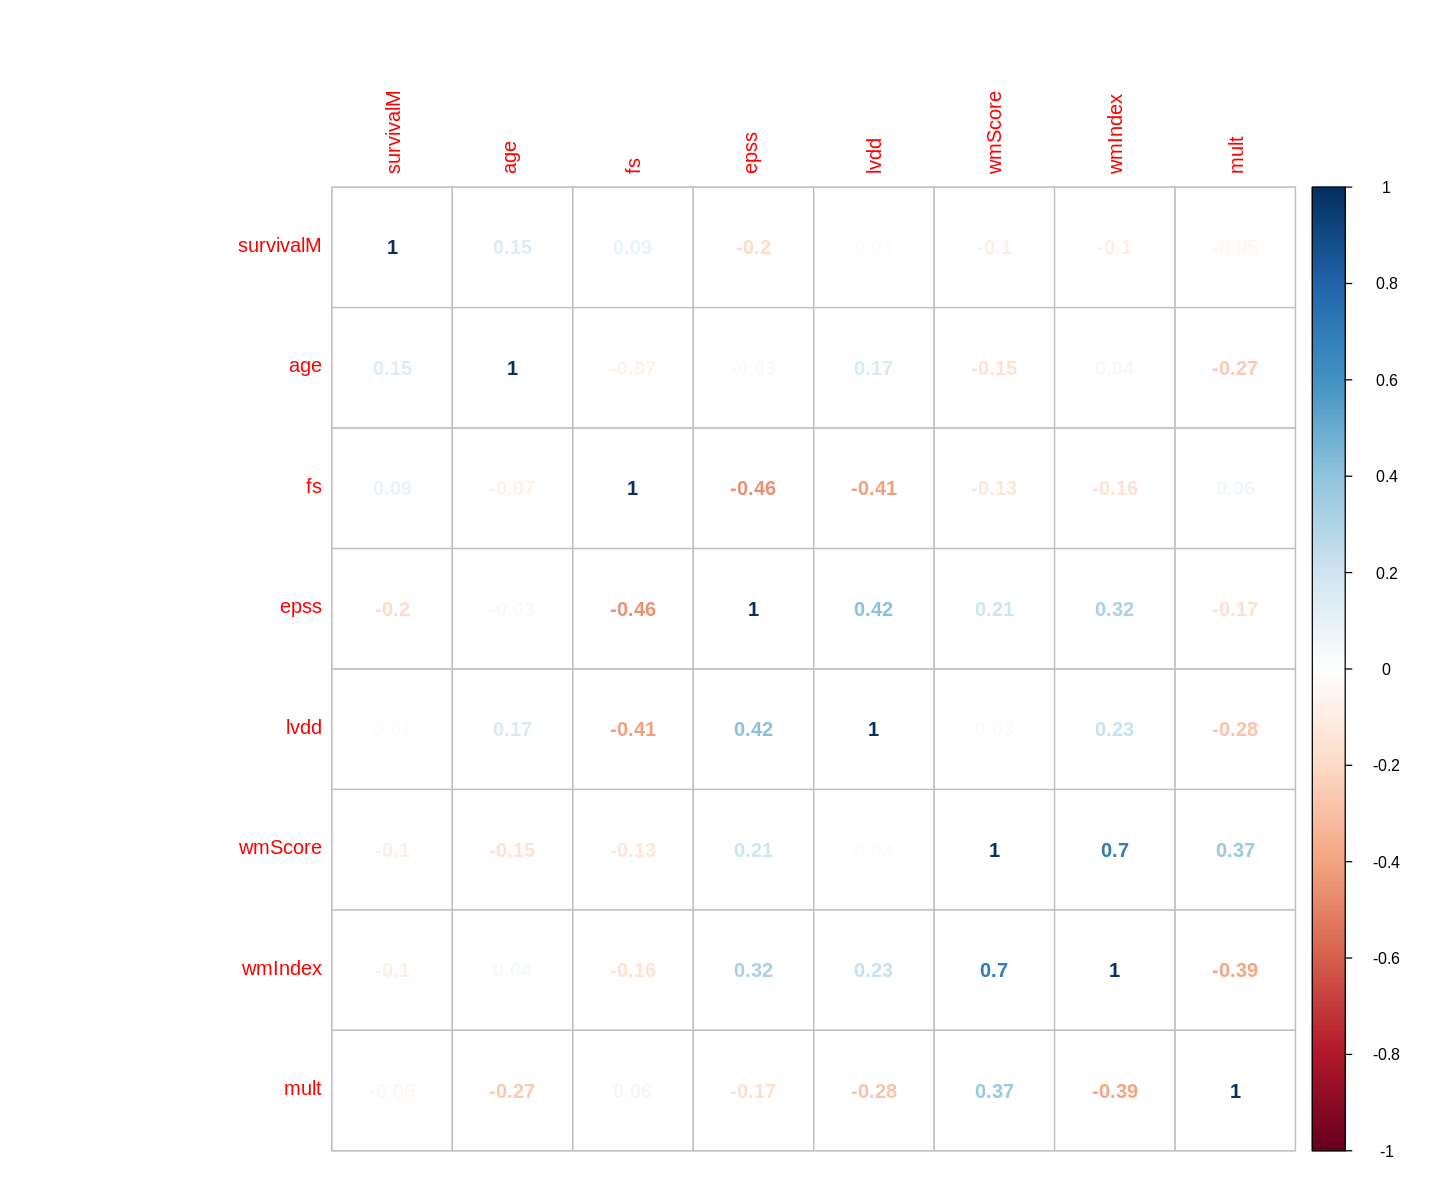

In [12]:
corrplot(corr,method="number")

* `wmIndex` and `wmScore` have strong positive correlation.
* `epss` and `fs` have a strong negative correlation.

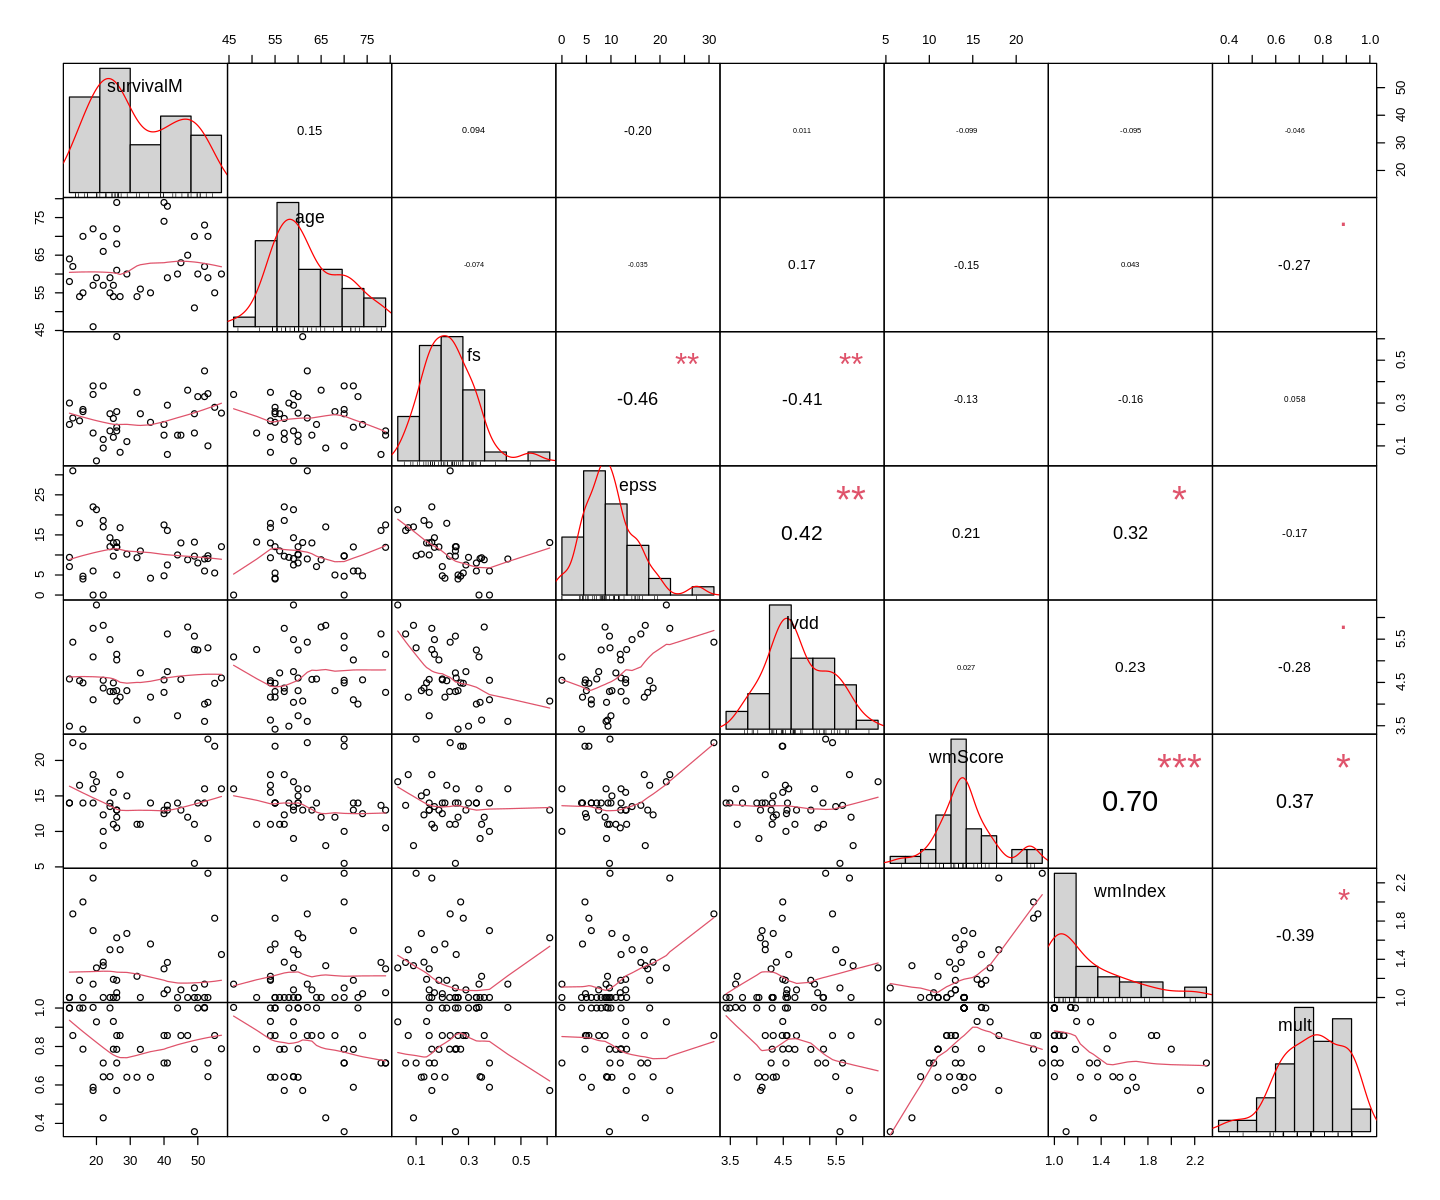

In [13]:
chart.Correlation(data1 %>% select(-c("pe","alive","alive1")), histogram=TRUE, pch=19)

### 4.4. Fitting a Model

In [14]:
model00 = lm(survivalM ~ pe+fs+age+epss+lvdd+wmIndex, data=data1)
summary(model00)


Call:
lm(formula = survivalM ~ pe + fs + age + epss + lvdd + wmIndex, 
    data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.383  -9.924  -1.892   9.598  26.472 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  13.7820    25.6953   0.536    0.595
peFluid       2.4329     6.5692   0.370    0.713
fs            6.0623    23.2446   0.261    0.796
age           0.2271     0.2889   0.786    0.437
epss         -0.4447     0.4579  -0.971    0.338
lvdd          2.2894     3.8212   0.599    0.553
wmIndex      -2.4753     6.8325  -0.362    0.719

Residual standard error: 14.46 on 35 degrees of freedom
Multiple R-squared:  0.07315,	Adjusted R-squared:  -0.08574 
F-statistic: 0.4604 on 6 and 35 DF,  p-value: 0.8327


In [15]:
model0 = lm(survivalM ~ pe+fs+alive+age+epss+lvdd+wmIndex
            +epss*lvdd+epss*lvdd+epss*fs+wmIndex*epss
            +I(epss^2), data=data1)
summary(model0)


Call:
lm(formula = survivalM ~ pe + fs + alive + age + epss + lvdd + 
    wmIndex + epss * lvdd + epss * lvdd + epss * fs + wmIndex * 
    epss + I(epss^2), data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.411  -8.717  -1.652  10.246  24.014 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)   -5.29494   51.10659  -0.104    0.918
peFluid        1.66905    6.63622   0.252    0.803
fs           -10.93558   66.53848  -0.164    0.871
aliveAlive    -6.37461   10.44968  -0.610    0.546
age            0.17895    0.28602   0.626    0.536
epss           1.31938    3.96569   0.333    0.742
lvdd           6.26716    8.96032   0.699    0.490
wmIndex       -4.57482   15.74821  -0.290    0.773
I(epss^2)     -0.09070    0.06116  -1.483    0.148
epss:lvdd     -0.12350    0.77976  -0.158    0.875
fs:epss        1.97370    5.28458   0.373    0.711
epss:wmIndex   0.52521    1.41779   0.370    0.714

Residual standard error: 14.24 on 30 degrees of freedom

### 4.5. Model Selection

In [16]:
models <- regsubsets(survivalM~ pe+fs+age+epss+lvdd
                     +epss*lvdd+wmIndex+epss*fs+wmIndex*epss+I(epss^2)
                     +I(lvdd^2)+I(wmIndex^2)+I(fs^2), data=data1)
summary.out <- summary(models, matrix =TRUE)
as.data.frame(summary.out$outmat)
summary(models)$which

,peFluid,fs,age,epss,lvdd,wmIndex,I(epss^2),I(lvdd^2),I(wmIndex^2),I(fs^2),epss:lvdd,fs:epss,epss:wmIndex
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1 ( 1 ),,,,,,,*,,,,,,
2 ( 1 ),,,,*,,,*,,,,,,
3 ( 1 ),,,,,,,*,,,,*,*,
4 ( 1 ),,,,*,*,,*,,,,,*,
5 ( 1 ),,,,*,*,,*,,,*,,*,
6 ( 1 ),,,*,*,*,,*,,,*,,*,
7 ( 1 ),,,*,*,,,*,*,,*,*,*,
8 ( 1 ),,*,*,*,,,*,*,,*,*,*,


,(Intercept),peFluid,fs,age,epss,lvdd,wmIndex,I(epss^2),I(lvdd^2),I(wmIndex^2),I(fs^2),epss:lvdd,fs:epss,epss:wmIndex
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
4,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
5,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE
6,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE
7,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE
8,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE


In [17]:
which.max(summary.out$adjr2)
summary.out$which[3,]
summary.out$which[2,]
summary.out$which[1,]

[1] 3

(Intercept)      peFluid           fs          age         epss         lvdd 
        TRUE        FALSE        FALSE        FALSE        FALSE        FALSE 
     wmIndex    I(epss^2)    I(lvdd^2) I(wmIndex^2)      I(fs^2)    epss:lvdd 
       FALSE         TRUE        FALSE        FALSE        FALSE         TRUE 
     fs:epss epss:wmIndex 
        TRUE        FALSE

(Intercept)      peFluid           fs          age         epss         lvdd 
        TRUE        FALSE        FALSE        FALSE         TRUE        FALSE 
     wmIndex    I(epss^2)    I(lvdd^2) I(wmIndex^2)      I(fs^2)    epss:lvdd 
       FALSE         TRUE        FALSE        FALSE        FALSE        FALSE 
     fs:epss epss:wmIndex 
       FALSE        FALSE

(Intercept)      peFluid           fs          age         epss         lvdd 
        TRUE        FALSE        FALSE        FALSE        FALSE        FALSE 
     wmIndex    I(epss^2)    I(lvdd^2) I(wmIndex^2)      I(fs^2)    epss:lvdd 
       FALSE         TRUE        FALSE        FALSE        FALSE        FALSE 
     fs:epss epss:wmIndex 
       FALSE        FALSE

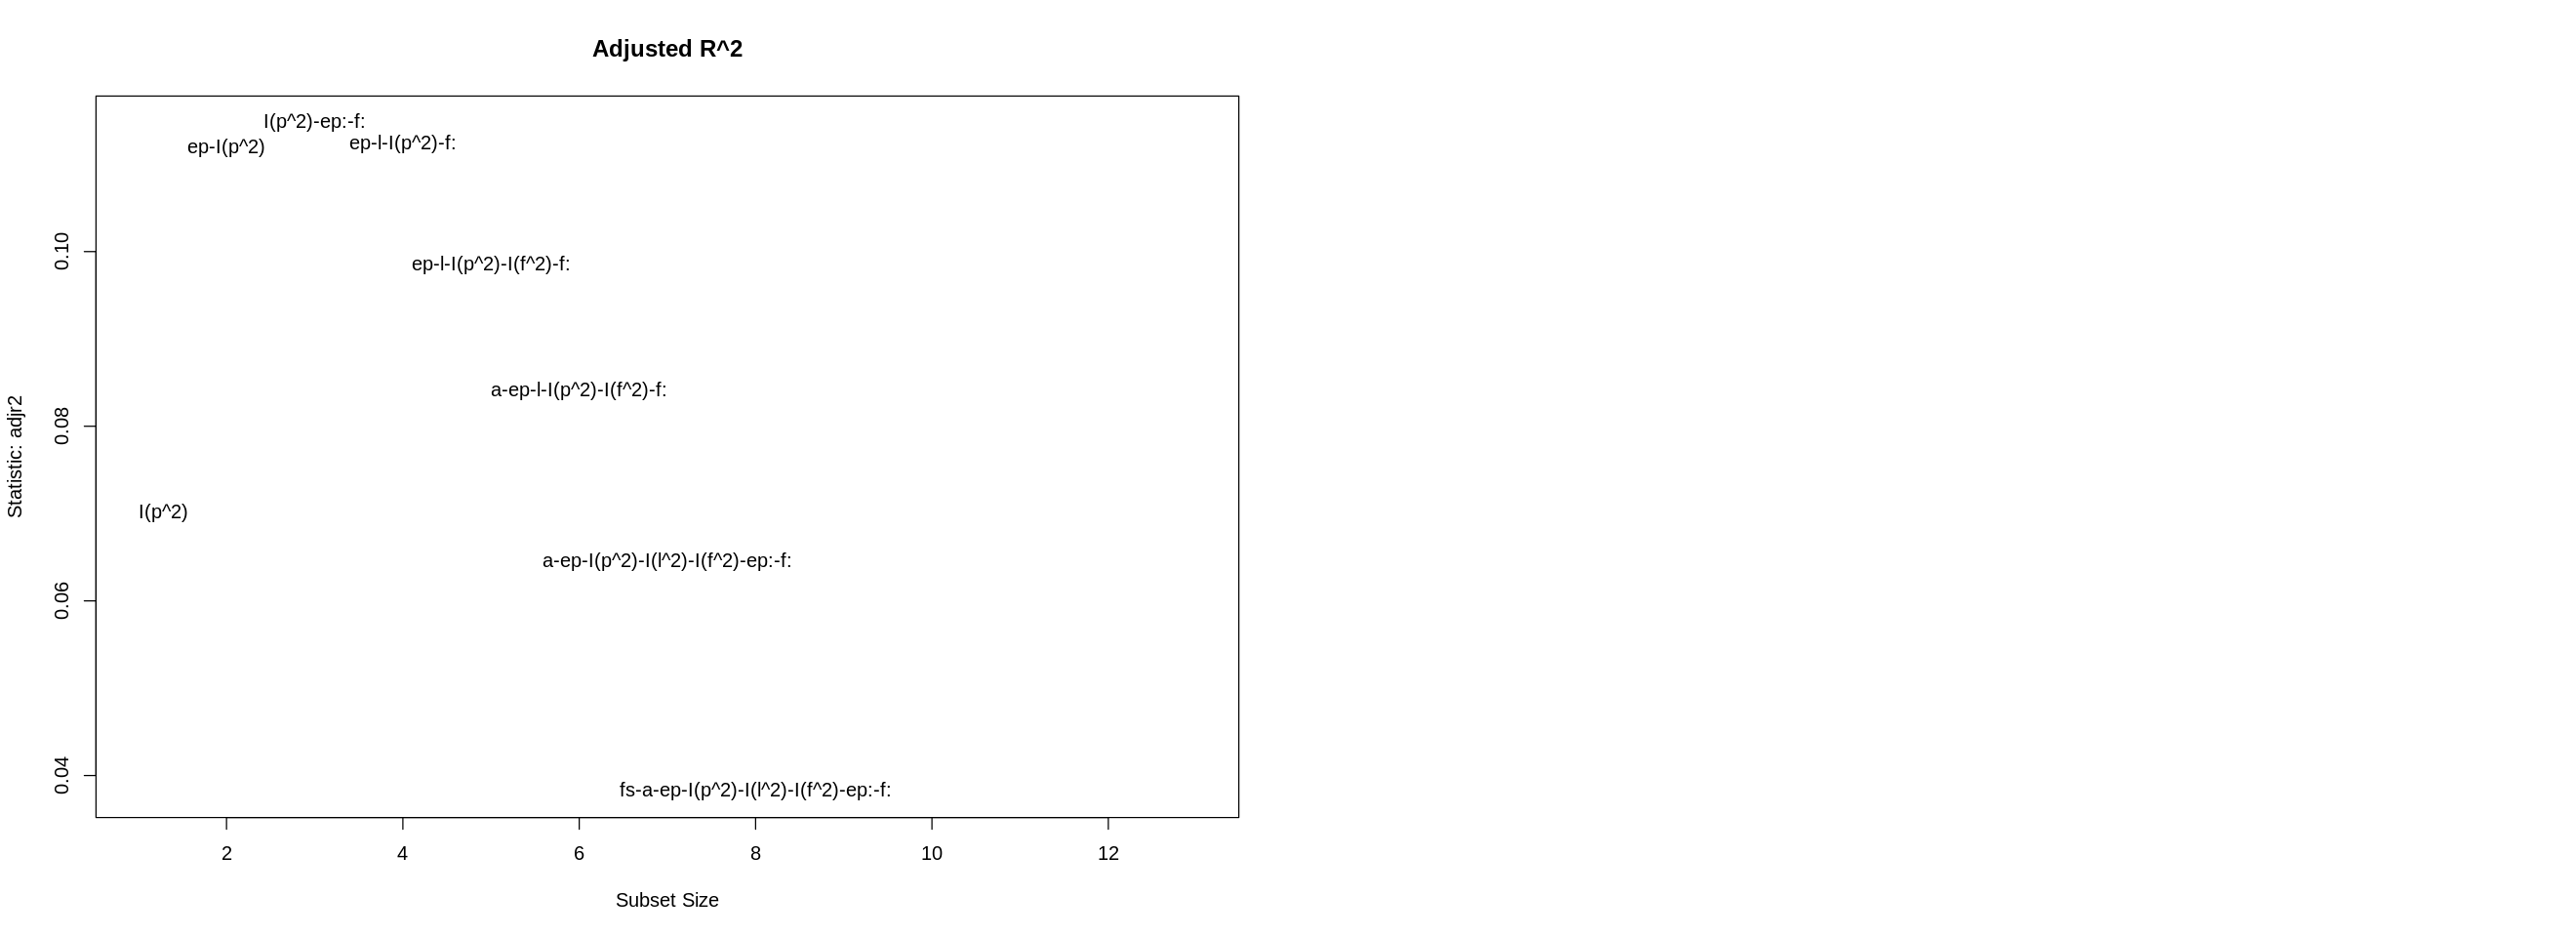

In [18]:
options(repr.plot.width=22, repr.plot.height=8)
layout(matrix(1:2, ncol = 2))
res.legend <-
    subsets(models, statistic="adjr2", legend = FALSE, main = "Adjusted R^2")

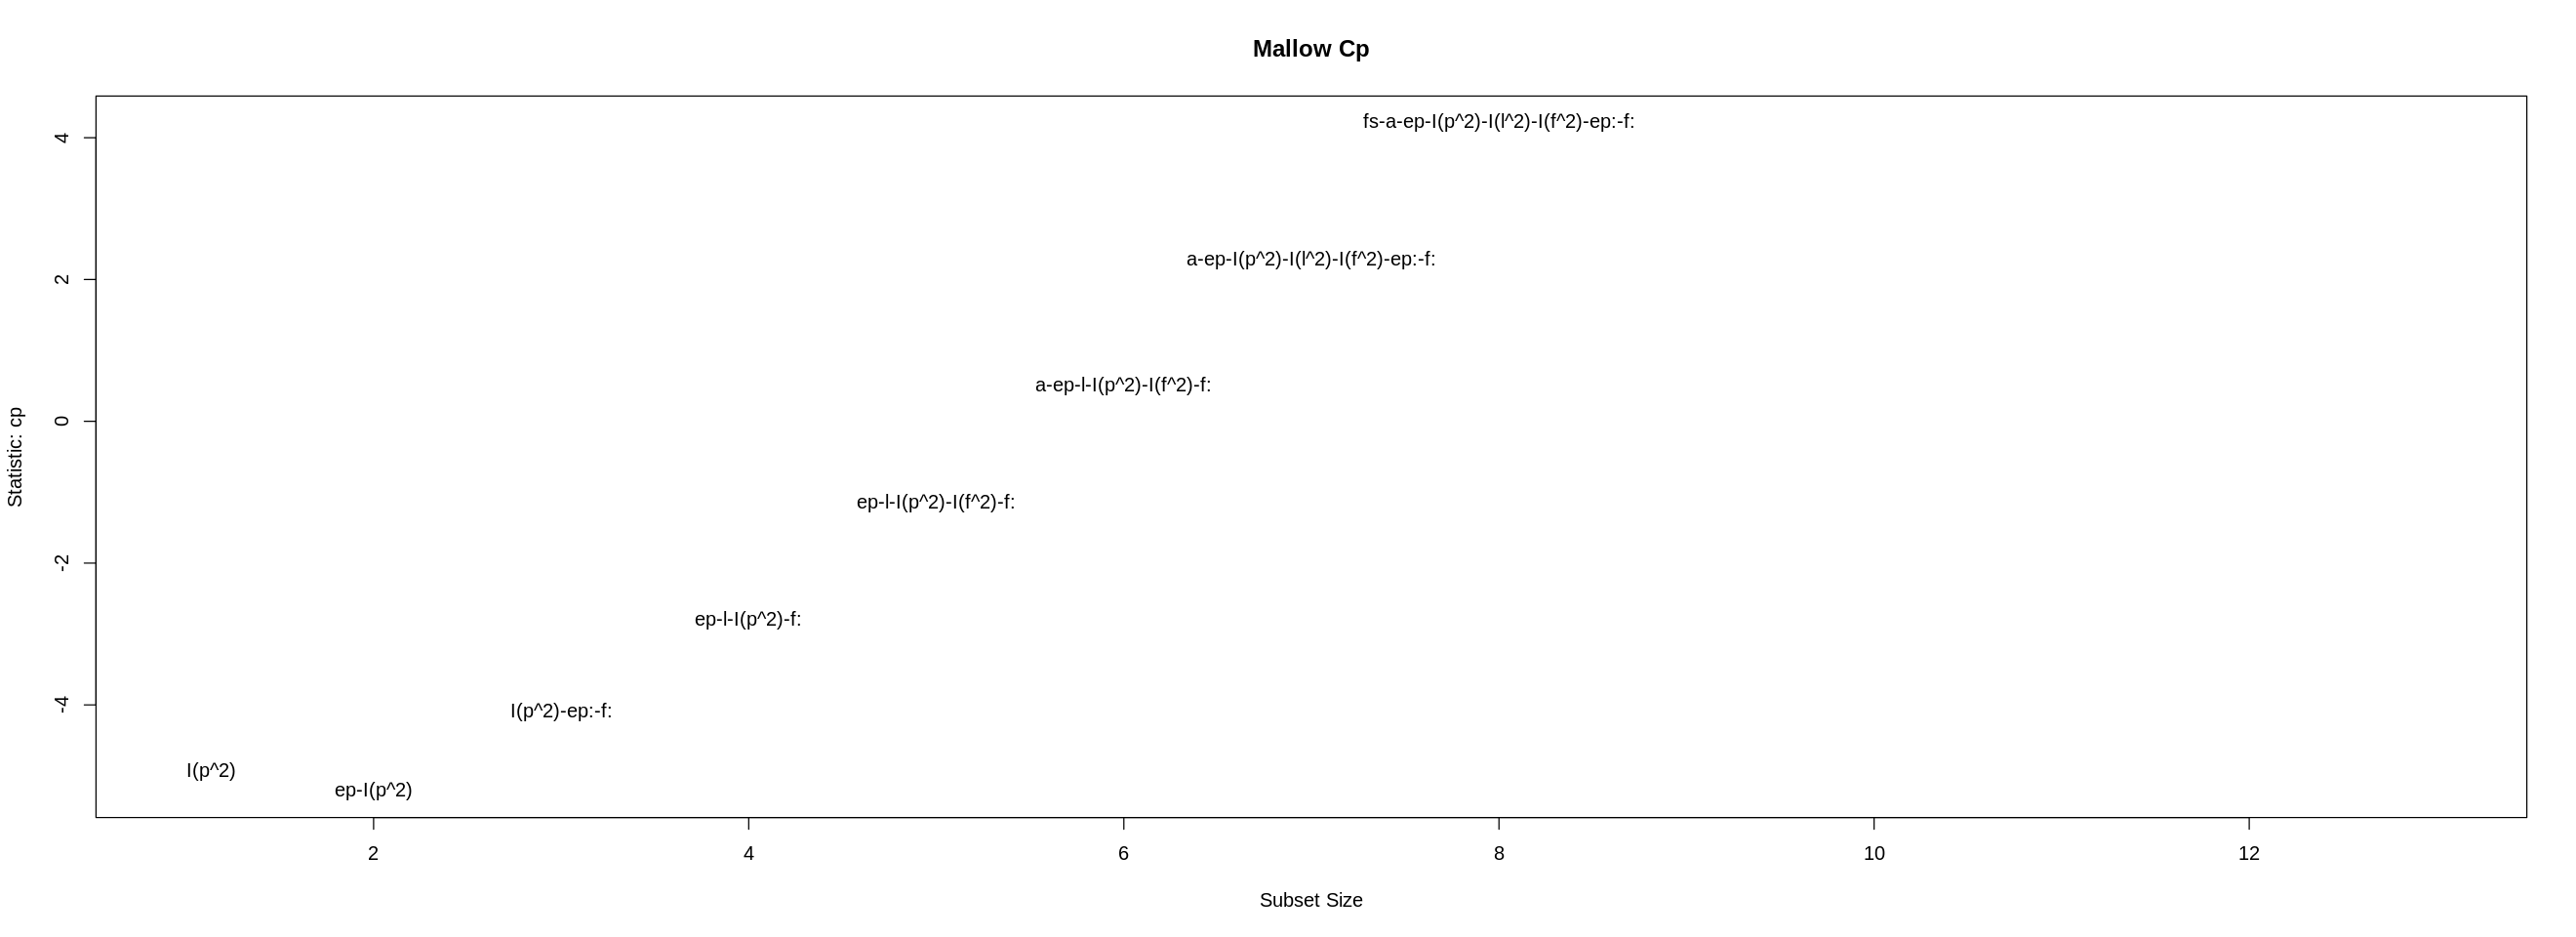

In [19]:
res.legend <- subsets(models, statistic="cp", legend = FALSE, main = "Mallow Cp")

In [20]:
res.sum <- summary(models)
data.frame(
  Adj.R2 = which.max(res.sum$adjr2),
  CP = which.min(res.sum$cp),
  BIC = which.min(res.sum$bic)
)

Adj.R2,CP,BIC
<int>,<int>,<int>
3,2,1


In [21]:
res.sum$cp
for (x in 1:8) {
  print(res.sum$cp[x] - x)
}


[1] -4.9352756 -5.2117027 -4.0986502 -2.8047440 -1.1514243  0.4952652  2.2732297
[8]  4.2109069

[1] -5.935276
[1] -7.211703
[1] -7.09865
[1] -6.804744
[1] -6.151424
[1] -5.504735
[1] -4.72677
[1] -3.789093


In [22]:
summary.out$which[6,]

(Intercept)      peFluid           fs          age         epss         lvdd 
        TRUE        FALSE        FALSE         TRUE         TRUE         TRUE 
     wmIndex    I(epss^2)    I(lvdd^2) I(wmIndex^2)      I(fs^2)    epss:lvdd 
       FALSE         TRUE        FALSE        FALSE         TRUE        FALSE 
     fs:epss epss:wmIndex 
        TRUE        FALSE

In [23]:
best_model6 =lm(survivalM ~ age+epss+lvdd+I(epss^2)+I(fs^2)+fs*epss,data=data1)
summary(best_model6)


Call:
lm(formula = survivalM ~ age + epss + lvdd + I(epss^2) + I(fs^2) + 
    fs * epss, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.903  -9.753  -1.792   8.605  22.620 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -8.96747   34.07138  -0.263   0.7940  
age           0.18386    0.27058   0.679   0.5014  
epss          1.39800    2.01521   0.694   0.4926  
lvdd          4.27941    3.67779   1.164   0.2527  
I(epss^2)    -0.08812    0.04119  -2.139   0.0397 *
I(fs^2)     -73.12106  118.84410  -0.615   0.5425  
fs           31.49877  106.48947   0.296   0.7692  
epss:fs       2.56697    4.82969   0.531   0.5985  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.46 on 34 degrees of freedom
Multiple R-squared:  0.2201,	Adjusted R-squared:  0.05955 
F-statistic: 1.371 on 7 and 34 DF,  p-value: 0.2492


In [24]:
best_model3 =lm(survivalM ~ epss*lvdd+fs*epss+I(epss^2),data=data1)
summary(best_model3)


Call:
lm(formula = survivalM ~ epss * lvdd + fs * epss + I(epss^2), 
    data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.976 -10.554  -2.003  10.120  21.793 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  -3.80851   41.04069  -0.093    0.927
epss          2.17523    3.38005   0.644    0.524
lvdd          7.97336    7.91699   1.007    0.321
fs          -20.75249   60.75830  -0.342    0.735
I(epss^2)    -0.07131    0.04249  -1.678    0.102
epss:lvdd    -0.30027    0.63669  -0.472    0.640
epss:fs       3.05041    4.71436   0.647    0.522

Residual standard error: 13.37 on 35 degrees of freedom
Multiple R-squared:  0.2076,	Adjusted R-squared:  0.0718 
F-statistic: 1.529 on 6 and 35 DF,  p-value: 0.1978


In [25]:
best_model_2 = lm(survivalM~ 
                I(epss^2)+
                epss, data=data1)
summary(best_model_2)


Call:
lm(formula = survivalM ~ I(epss^2) + epss, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.943  -9.427  -4.620  10.670  22.117 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.22347    6.39487   4.101 0.000202 ***
I(epss^2)   -0.07876    0.03414  -2.307 0.026467 *  
epss         1.66798    0.98226   1.698 0.097453 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.08 on 39 degrees of freedom
Multiple R-squared:  0.1552,	Adjusted R-squared:  0.1119 
F-statistic: 3.582 on 2 and 39 DF,  p-value: 0.03731


In [26]:
best_model_1 = lm(survivalM~ 
                I(epss^2), data=data1)
summary(best_model_1)


Call:
lm(formula = survivalM ~ I(epss^2), data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.817  -8.144  -3.344  12.483  24.497 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.04303    2.79401  12.900 7.74e-16 ***
I(epss^2)   -0.02433    0.01203  -2.022   0.0499 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.38 on 40 degrees of freedom
Multiple R-squared:  0.09272,	Adjusted R-squared:  0.07004 
F-statistic: 4.088 on 1 and 40 DF,  p-value: 0.04991


### 4.5.1 Cross Validation

In [27]:
set.seed(1)
model_3 = glm(survivalM ~ epss*lvdd+fs*epss+I(epss^2), data=data1)
cv_error = cv.glm(data1, model_3, K = 3)
cv_error$delta

[1] 276.6717 242.1956

In [28]:
set.seed(1)
model_6 = glm(survivalM ~ age+epss+lvdd+I(epss^2)+I(fs^2)+fs*epss,data=data1)
cv_error = cv.glm(data1, model_6, K = 3)
cv_error$delta

[1] 401.9720 327.4236

In [29]:
set.seed(1)
model_2 = glm(survivalM~ epss + I(epss^2), data=data1)
cv_error = cv.glm(data1, model_2, K = 3)
cv_error$delta

[1] 188.6774 181.2931

In [30]:
set.seed(1)
model_1 = glm(survivalM~ I(epss^2), data=data1)
cv_error = cv.glm(data1, model_1, K = 3)
cv_error$delta

[1] 180.6875 178.6619

### 4.5.2. Leave-one-out Cross Validation

In [31]:
set.seed(1)
model_3 = glm(survivalM ~ epss*lvdd+fs*epss+I(epss^2), data=data1)
cv_error = cv.glm(data1, model_3, K = 42)
cv_error$delta

[1] 338.4401 334.7781

In [32]:
set.seed(1)
model_6 = glm(survivalM ~ age+epss+lvdd+I(epss^2)+I(fs^2)+fs*epss,data=data1)
cv_error = cv.glm(data1, model_6, K = 42)
cv_error$delta

[1] 553.5197 545.0601

In [33]:
set.seed(1)
model_2 = glm(survivalM~ epss + I(epss^2), data=data1)
cv_error = cv.glm(data1, model_2, K = 42)
cv_error$delta

[1] 221.6413 220.5316

In [34]:
set.seed(1)
model_1 = glm(survivalM~ I(epss^2), data=data1)
cv_error = cv.glm(data1, model_1, K = 42)
cv_error$delta

[1] 182.3272 182.1851

## 4.6. Other Models

Multivariate Regression might not be the suitable model here. We could go about our research question in two ways by using `survivalM` as a response variable or using `alive1` which is a factor. But regression needs the response variable to be a continuous variable. And based on the EDA plots above, it is highly possible that the relationship is not linear between the variables we're interested in. Also the data we have is imbalanced. 

Therefore, below are some of the models that we believe are suitable for this data. However, the implementation is not provided for these models as these are out of the scope of this course:

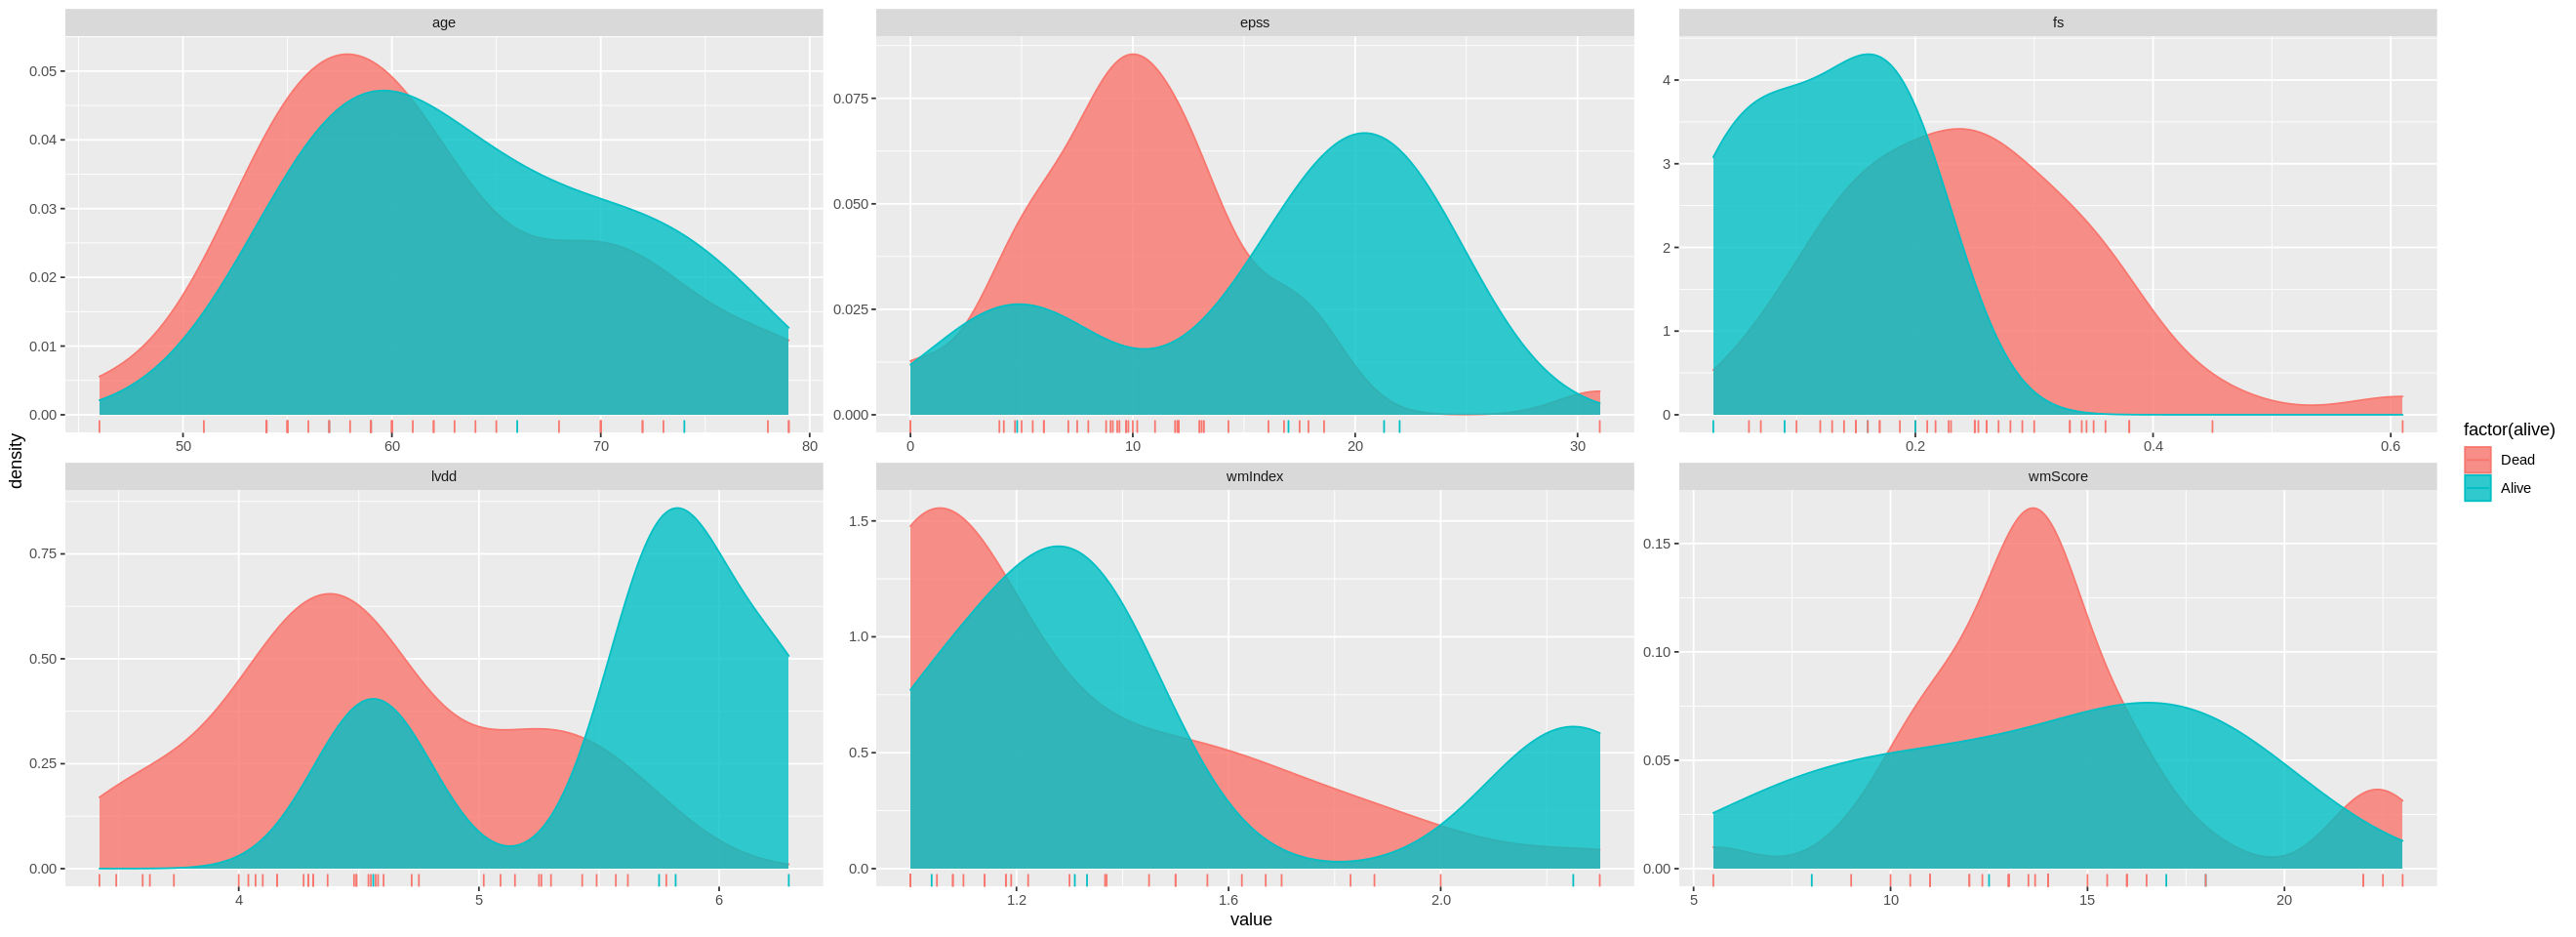

In [35]:
data1 %>%  select(-c("pe"))  %>% gather(age:wmIndex, key='levels', value='value') %>% 
          ggplot(aes(x = value, fill = factor(alive), color = factor(alive))) + geom_density(alpha = 0.8) + geom_rug() +  facet_wrap(~ levels, scales = 'free',ncol = 3)

### 4.6.1. Survival Analysis: Cox Regression
Censoring data, Kaplan-Meier Method, Log Rank Test and Cox Proportional Hazards Models

Refer: 
* https://www.datacamp.com/community/tutorials/survival-analysis-R

* https://www.kaggle.com/yukikitayama/survival-analysis

This might be a suitable model for our data before it simultaneously evaluates the effect of various factors on the survival (response variable).

In [36]:
install.packages('survival')
library(survival)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)


Attaching package: ‘survival’


The following object is masked from ‘package:boot’:

    aml


The following object is masked from ‘package:caret’:

    cluster




In [37]:
reg.cox = coxph(survivalM ~pe+fs+alive+age+epss+lvdd
                     +epss*lvdd+wmIndex+epss*fs+wmIndex*epss+I(epss^2)
                     +I(lvdd^2)+I(wmIndex^2)+I(wmScore^2)+I(fs^2)+wmScore+wmScore*wmIndex, data=data1)
reg.cox

ERROR: Error in coxph(survivalM ~ pe + fs + alive + age + epss + lvdd + epss * : Response must be a survival object


### 4.6.2. Decision Trees

Upon further research we see that the decision tree models can achieve upto $80\%$ accuracy. These models can capture classes significantly. However, the imbalanced data can hinder its performance metric AUC so using Kappa is a good metric to use.

Refer: https://www.kaggle.com/loganalive/echocardiogram-dataset-uci

### 4.6.3. Random Forest

An even better model than Decision Trees is a Random Forest model. Random Forest is just a collection of several decision trees and is much more robust limiting overfitting. These are also very effective at "estimating missing data and maintaining accuracy" when huge proportions of the data is missing. It deals efficiently with the imbalanced data by balancing errors.

Refer: 

* https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991
* https://www.datacamp.com/community/tutorials/decision-trees-R

## 5. Conclusion
### 5.1. Findings

In conclusion, we found that we are unable to generate a proper multivariate linear regressionmodel to identify the correlation between echocardiograohy results and the patients’ survivalmonths.  Based on our model selection result, the best model selected were only able to generatean adjusted r-squared lower than $50\%$.

### 5.2. Limitations

By reviewing our analysis process and result, we concluded the main limitations that potentially caused the failure of this study.

First, the data set that we choose only has less that 200 records, with many missing values thatwe had to omit or replace with mean values, while we have 8 variables to test in this study.  Thesmall sample size might have caused the inaccuracy of the model generated.

Secondly, there might be a variety of factors that can affect a patient’ survival months, includinggender, lifestyle (smoking, drinking, sleeping habits), other underlying health conditions and soon.  The echocardiography might only make very limited contribution to the patient’ survivalmonths.

Moreover, linear regression model might not be suitable for this study.  After extensive research,we found that for similar studies, cox regression and decision trees are applied in further studies,which can generate models with much higher accuracy

### 5.3. Future Outlook

In  our  future  studies,  we  will  first  aim  to  collect  a  larger,  more  up-to-date  data  set.   Wewill then apply cox regression and decision trees to identify the potential correlation betweenechocardiograohy results and the patients’ survival months.  We still believe that such study canpotentially help identify key echocardiography factors that are indicative of the patients’ survival,thus better precautions can be taken in advance